In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fake-and-real-news-dataset/True.csv
/kaggle/input/fake-and-real-news-dataset/Fake.csv


In [2]:
#Importing necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.model_selection import train_test_split
from wordcloud import WordCloud, STOPWORDS
from sklearn.metrics import confusion_matrix

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
fake = pd.read_csv('/kaggle/input/fake-and-real-news-dataset/Fake.csv')
fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [4]:
true = pd.read_csv('/kaggle/input/fake-and-real-news-dataset/True.csv')
true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [5]:
fake['category'] = 1

In [6]:
fake.head()

,title,text,subject,date,category
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",1
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",1
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",1
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",1
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",1


In [7]:
true['category'] = 0

In [8]:
true.head()

,title,text,subject,date,category
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",0
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",0
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",0
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",0
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",0


## Importing the data

In [9]:
#Combining both fake and true news
data = pd.concat([true,fake])
data

,title,text,subject,date,category
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",0
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",0
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",0
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",0
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",0
...,...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",1
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",1
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",1
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",1


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44898 entries, 0 to 23480
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   title     44898 non-null  object
 1   text      44898 non-null  object
 2   subject   44898 non-null  object
 3   date      44898 non-null  object
 4   category  44898 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 2.1+ MB


In [11]:
#check for null values
data.isna().sum()

title       0
text        0
subject     0
date        0
category    0
dtype: int64

In [12]:
#check for duplicate values
data.duplicated().sum()

209

In [13]:
data[data.duplicated()]

,title,text,subject,date,category
445,Senate tax bill stalls on deficit-focused 'tri...,WASHINGTON (Reuters) - The U.S. Senate on Thur...,politicsNews,"November 30, 2017",0
778,Trump warns 'rogue regime' North Korea of grav...,BEIJING (Reuters) - U.S. President Donald Trum...,politicsNews,"November 8, 2017",0
892,"Republicans unveil tax cut bill, but the hard ...",WASHINGTON (Reuters) - U.S. House of Represent...,politicsNews,"November 2, 2017",0
896,Trump taps Fed centrist Powell to lead U.S. ce...,WASHINGTON (Reuters) - President Donald Trump ...,politicsNews,"November 2, 2017",0
974,"Two ex-Trump aides charged in Russia probe, th...",WASHINGTON (Reuters) - Federal investigators p...,politicsNews,"October 30, 2017",0
...,...,...,...,...,...
21353,Thailand's ousted PM Yingluck has fled abroad:...,BANGKOK (Reuters) - Ousted Thai prime minister...,worldnews,"August 25, 2017",0
21408,"U.S., North Korea clash at U.N. forum over nuc...",GENEVA (Reuters) - North Korea and the United ...,worldnews,"August 22, 2017",0
9942,HILLARY TWEETS MESSAGE In Defense Of DACA…OOPS...,No time to waste we've got to fight with eve...,politics,"Sep 9, 2017",1
11446,FORMER DEMOCRAT WARNS Young Americans: “Rioter...,"Who is silencing political speech, physically...",politics,"Mar 10, 2017",1


In [14]:
#Drop duplicates
data.drop_duplicates(inplace=True)

In [15]:
#Changing the data type of date column
data['date'] = pd.to_datetime(data['date'],errors = 'coerce')

## Exploratory Data Analysis

<Axes: xlabel='category', ylabel='count'>

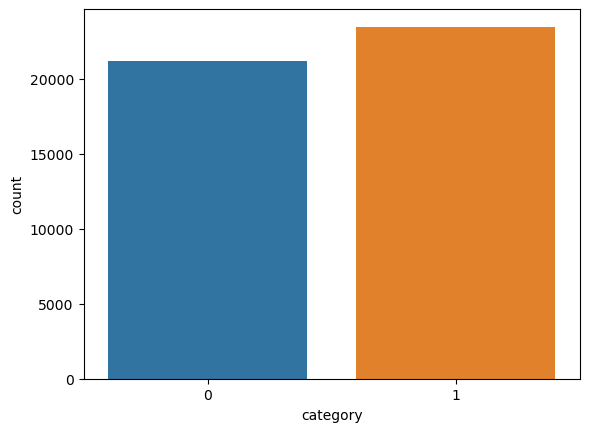

In [16]:
# plotting the y variable
sns.countplot(x=data['category'])
#The y variable seems mostly balanced.

In [17]:
data['subject'].value_counts()

politicsNews       11220
worldnews           9991
News                9050
politics            6838
left-news           4459
Government News     1570
US_News              783
Middle-east          778
Name: subject, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'politicsNews'),
  Text(1, 0, 'worldnews'),
  Text(2, 0, 'News'),
  Text(3, 0, 'politics'),
  Text(4, 0, 'Government News'),
  Text(5, 0, 'left-news'),
  Text(6, 0, 'US_News'),
  Text(7, 0, 'Middle-east')])

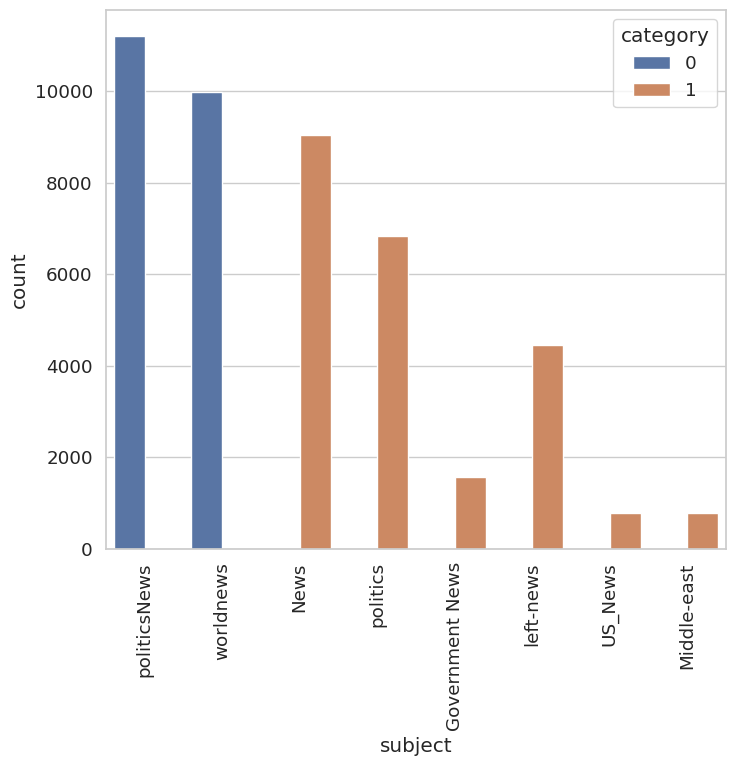

In [18]:
#Plotting the subject column in the dataset
plt.figure(figsize=(8,7))
sns.set(style = 'whitegrid',font_scale=1.2)
sns.countplot(x='subject', hue = 'category',data= data)
plt.xticks(rotation=90)

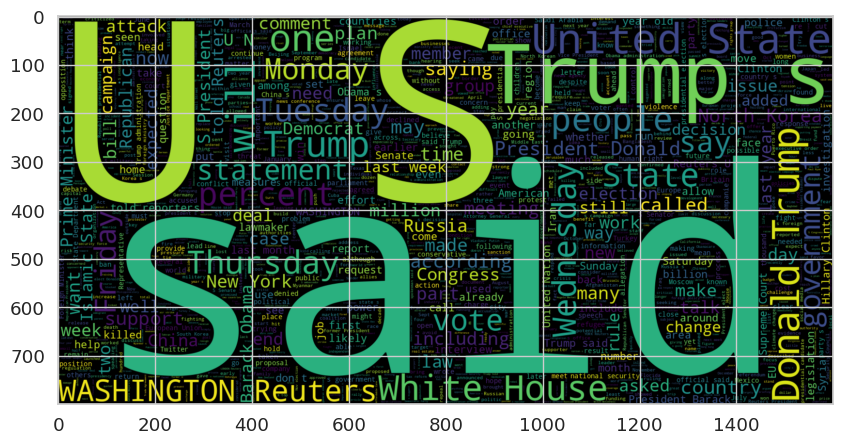

In [19]:
#Word Cloud for text that is true
plt.figure(figsize=(10,10)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800,stopwords=STOPWORDS).generate(" ".join(data[data.category == 0].text))
plt.imshow(wc,interpolation='bilinear')

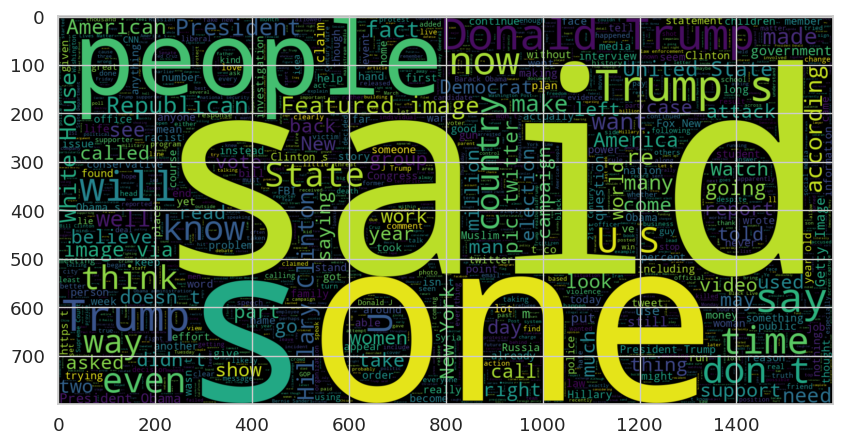

In [20]:
#Word Cloud for text that is fake
plt.figure(figsize=(10,10))
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800,stopwords=STOPWORDS).generate(" ".join(data[data.category == 1].text))
plt.imshow(wc,interpolation='bilinear')

/opt/conda/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/tmp/ipykernel_32/3981982803.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(word.map(lambda x:np.mean(x)),ax=ax1,color='red')
/opt/conda/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/conda/lib/python3.10/site-p

Text(0.5, 0.98, 'Average word length in each text')

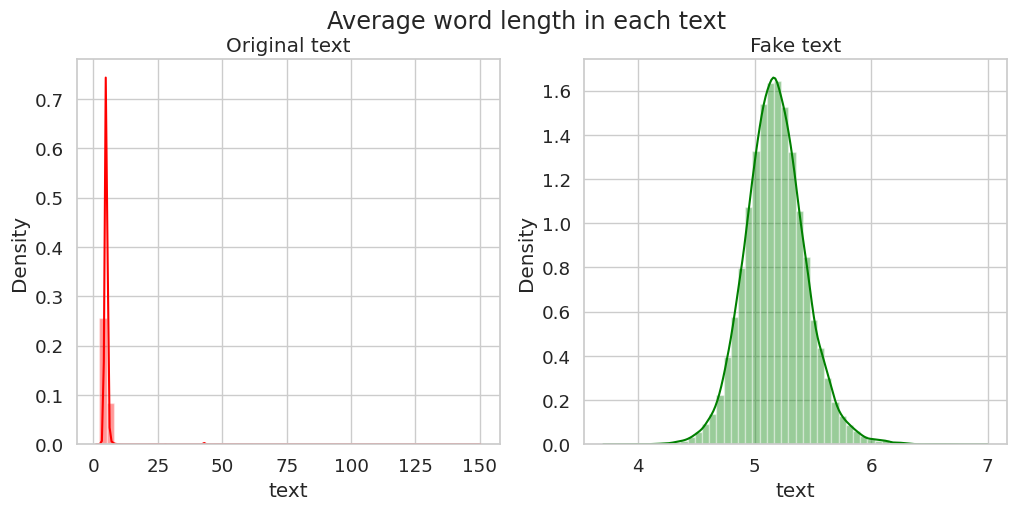

In [21]:
#Average word length in a text
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(12,5))
word = data[data['category']==1]['text'].str.split().apply(lambda x: [len(i) for i in x])
sns.distplot(word.map(lambda x:np.mean(x)),ax=ax1,color='red')
ax1.set_title('Original text')
word = data[data['category']==0]['text'].str.split().apply(lambda x: [len(i) for i in x])
sns.distplot(word.map(lambda x:np.mean(x)),ax=ax2,color='green')
ax2.set_title('Fake text')
fig.suptitle('Average word length in each text')

## Data Preprocessing

In [22]:
df = data.copy()

In [23]:
df.reset_index(inplace=True)


import re
ps = PorterStemmer()
corpus = []
for i in range(0, len(df)):
    review = re.sub('[^a-zA-Z]', ' ', df['text'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [24]:
#Combining the text and title column
df['text'] = df['title']+ " " + df['text']

In [25]:
df['text'][0]

'As U.S. budget fight looms, Republicans flip their fiscal script WASHINGTON (Reuters) - The head of a conservative Republican faction in the U.S. Congress, who voted this month for a huge expansion of the national debt to pay for tax cuts, called himself a “fiscal conservative” on Sunday and urged budget restraint in 2018. In keeping with a sharp pivot under way among Republicans, U.S. Representative Mark Meadows, speaking on CBS’ “Face the Nation,” drew a hard line on federal spending, which lawmakers are bracing to do battle over in January. When they return from the holidays on Wednesday, lawmakers will begin trying to pass a federal budget in a fight likely to be linked to other issues, such as immigration policy, even as the November congressional election campaigns approach in which Republicans will seek to keep control of Congress. President Donald Trump and his Republicans want a big budget increase in military spending, while Democrats also want proportional increases for non

In [26]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import re

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

def preprocess_text(text):
    # Remove special characters and digits using regular expressions
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    
    # Convert to lowercase
    text = text.lower()

    # Tokenize the text into words
    words = word_tokenize(text)

    # Remove stopwords (commonly used words that do not add much meaning)
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]

    # Lemmatize words (reduce words to their base or root form)
    ps = PorterStemmer()
    words = [ps.stem(word) for word in words]

    # Join the processed words back into a string
    processed_text = ' '.join(words)

    return processed_text

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [27]:
corpus = df['text'].apply(lambda x:preprocess_text(x))

In [28]:
corpus

0        u budget fight loom republican flip fiscal scr...
1        u militari accept transgend recruit monday pen...
2        senior u republican senat let mr mueller job w...
3        fbi russia probe help australian diplomat tip ...
4        trump want postal servic charg much amazon shi...
                               ...                        
44684    mcpain john mccain furiou iran treat us sailor...
44685    justic yahoo settl e mail privaci class action...
44686    sunnistan us alli safe zone plan take territor...
44687    blow million al jazeera america final call qui...
44688    u navi sailor held iranian militari sign neoco...
Name: text, Length: 44689, dtype: object

In [29]:
cv = CountVectorizer(max_features=10000,ngram_range=(1,3))
X = cv.fit_transform(corpus).toarray()

In [30]:
X.shape

(44689, 10000)

In [31]:
y = df['category']

## Training the Model

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

In [33]:
from sklearn.naive_bayes import MultinomialNB
classifier=MultinomialNB()
from sklearn import metrics
from sklearn.metrics import classification_report
import itertools
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96      6958
           1       0.97      0.96      0.97      7790

    accuracy                           0.97     14748
   macro avg       0.97      0.97      0.97     14748
weighted avg       0.97      0.97      0.97     14748



In [34]:
confusion_matrix(y_test,pred)

array([[6760,  198],
       [ 294, 7496]])

In [35]:
#pip install gensim

## Trying Word2Vec 

In [36]:
from gensim.models import Word2Vec

In [37]:
model = Word2Vec(
    window=10,
    min_count=2,
    workers=4,)


In [38]:
model.build_vocab(corpus, progress_per=1000)

In [39]:
#Train the Word2Vec Model
model.train(corpus, total_examples=model.corpus_count, epochs=model.epochs)

(59717606, 348978095)

In [40]:
model.save("/kaggle/working/fake-and-real-news-dataset.model")

In [41]:
pwd

'/kaggle/working'

In [42]:
word2vec_model = Word2Vec.load('/kaggle/working/fake-and-real-news-dataset.model')

In [43]:
def preprocess_text(text):
    # Implement your text preprocessing steps here
    # For example, you can tokenize the text, remove stopwords, etc.
    words = text.split()
    embeddings = [word2vec_model.wv[word] for word in words if word in word2vec_model.wv]
    return np.mean(embeddings, axis=0) if embeddings else np.zeros(word2vec_model.vector_size)

In [44]:
df['embeddings'] = df['text'].apply(preprocess_text)

In [46]:
X_train, X_test, y_train, y_test = train_test_split(df['embeddings'].tolist(), df['category'], test_size=0.2, random_state=42)

In [50]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
#Initialize the machine learning model 
model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

#Train the machine learning model on the training data
model.fit(X_train, y_train)

#Make predictions on the test data
y_pred = model.predict(X_test)

#Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8034235846945625


In [51]:
confusion_matrix(y_test,y_pred)

array([[3669,  621],
       [1136, 3512]])